# Move data from Google Drive to Local

Instead, all data is local to this notebook. Simply `ls` to see it.



In [ ]:
# ls our data 
# ls "/content/drive/My Drive/Colab Notebooks/mlBioinfor/merlin-p_inferred_networks/yeast_networks/expression/"

# copy data from Google Drive to local (easy to work with locally)
# cp -r "/content/drive/My Drive/Colab\ Notebooks/mlBioinfor/merlin-p_inferred_networks/yeast_networks/ . 

cp: cannot stat '/content/drive/My Drive/Colab Notebooks/mlBioinfor/merlin-p_inferred_networks/yeast_networks/priors/*.txt': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/mlBioinfor/merlin-p_inferred_networks/yeast_networks/expression"

KO_TF_names.txt  NatVar_TF_names.txt  Stress_TF_names.txt
KO.txt		 NatVar.txt	      Stress.txt


In [ ]:
# the next line copies all the expression data here

In [ ]:
cp -r /content/drive/MyDrive/Colab\ Notebooks/mlBioinfor/merlin-p_inferred_networks/yeast_networks/expression/* . 

In [3]:
ls

GradientBoostedGRN.ipynb    NatVar_TF_names.txt
KO.txt.tar.gz               Stress.txt.tar.gz
KO_TF_names.txt             Stress_TF_names.txt
NatVar.txt.tar.gz           merlin-p_inferred_networks/


# Global vars

In [1]:
USE_IMPUTE_NANS = True               # False simply removes all rows containg nans.
KNN_IMPUTE_NEIGHBORS_INT = 5         # Impute only, number of neighbors.


# Preprocess (expression) data

In [2]:
# all data is local (expression is top level, gold, inferred and priors folders are here too)
%ls

FEAT_IMPORTANCE_MATRIX.csv  Stress.txt                     gridSearchHAL.py
GradientBoostedGRN.ipynb    Stress_TF_names.txt            gridSearchNeg1HAL.py
KO.txt                      cmdLineLog.log                 inferred/
KO_TF_names.txt             expression/                    kasXGBoost.log
NatVar.txt                  featImportanceWithNDArray.txt  priors/
NatVar_TF_names.txt         featImportanceWithPANDAS.txt   test.ipynb
README.md                   gold/


In [3]:
import pandas as pd

ko_exp = pd.read_csv("KO.txt", delimiter='\t')
nat_var_exp = pd.read_csv("NatVar.txt", delimiter='\t')
stress_exp = pd.read_csv("Stress.txt", delimiter='\t')

stress_exp = stress_exp.rename(columns={'Name':'Gene'}) # standardize names

# join 3 expression datasets
merged = pd.merge(
    ko_exp,
    nat_var_exp,
    how='outer',
    on='Gene',
    left_index=False,
    right_index=False,
    sort=True,
    copy=True,
)

all_exp = pd.merge(
    merged,
    stress_exp,
    how='outer',
    on='Gene',
    left_index=False,
    right_index=False,
    sort=True,
    copy=True,
)

ordered_feature_names_list = all_exp.columns.values.tolist()
ordered_feature_names_list.remove('Gene')
ordered_gene_names_list = all_exp.get("Gene").tolist()
all_exp

Gene  GSM104794  GSM104795  GSM104796  GSM104797  GSM104798  \
0       Q0085   2.212561   2.227792  -1.354311   1.265682   2.552600   
1     YAL001C   1.877282   0.792528   0.837804   0.961330   1.454442   
2     YAL002W   2.178248   2.100545   1.551263   2.317476   0.890635   
3     YAL003W  -2.532388  -1.544781  -1.318715  -1.477227  -0.719692   
4     YAL004W  -0.347135   0.575591  -1.408693  -0.951195   0.699379   
...       ...        ...        ...        ...        ...        ...   
6266  YPR200C   0.151269   0.506738   0.098920   2.222475   0.806458   
6267  YPR201W   0.402906   0.843848   1.569734   0.927955   1.248032   
6268  YPR202W   0.928310   0.561436   0.793346   2.523296   1.737987   
6269  YPR203W   0.548705  -0.847004   0.920359   0.526293   0.600200   
6270  YPR204W   0.690842  -0.159047   0.603408   2.288298  -0.275976   

      GSM104799  GSM104800  GSM104801  GSM104802  ...  29_deg_growth_ct-1  \
0      1.430975   1.065265   2.557423   0.922700  ...                 NaN   
1      0.761020   2.196026   0.170064   0.908378  ...           -0.660846   
2      1.445375   1.254454   0.294086   0.964687  ...           -1.436190   
3     -3.320243  -2.146262  -1.461836  -0.849606  ...            2.065360   
4      0.269393  -0.778675   0.352282  -0.690869  ...           -3.161950   
...         ...        ...        ...        ...  ...                 ...   
6266  -0.141884   0.494312   0.418556   0.532628  ...           -0.535791   
6267   0.793631   0.881041   0.368774   0.560338  ...            0.264564   
6268   0.424418   0.426921   1.280066   0.469689  ...            1.114940   
6269  -0.613126   0.532026   1.180380   0.363490  ...            1.465100   
6270   0.084204   0.227476   0.624858  -1.083913  ...            0.614719   

      37_deg_growth_ct-1  steady_state_15_dec_C_ct-2  \
0                    NaN                         NaN   
1              -2.039850                   -1.019870   
2              -0.732129                   -0.308816   
3              -1.354850                    1.160680   
4              -0.503797                   -0.664341   
...                  ...                         ...   
6266            0.803920                    1.776930   
6267            0.201955                    1.848030   
6268           -0.732129                    1.350300   
6269           -0.462282                    1.018470   
6270           -0.566070                    0.947370   

      steady_state_17_dec_C_ct-2  steady_state_21_dec_C_ct-2  \
0                            NaN                         NaN   
1                      -0.315936                   -1.274380   
2                      -0.451953                   -0.678249   
3                       1.180240                    1.184680   
4                       0.014389                    0.389828   
...                          ...                         ...   
6266                    2.015770                    0.240794   
6267                    0.966504                    0.116599   
6268                   -2.531060                    0.638218   
6269                   -1.695530                   -0.255986   
6270                   -1.578950                    0.265633   

      steady_state_25_dec_C_ct-2  steady_state_29_dec_C_ct-2  \
0                            NaN                         NaN   
1                       0.862317                    0.471186   
2                      -0.148299                   -0.147555   
3                       1.979310                    2.130540   
4                       0.543175                   -0.906918   
...                          ...                         ...   
6266                   -1.212100                   -1.019420   
6267                   -1.424870                   -0.963167   
6268                    0.782531                   -0.456925   
6269                    0.064462                   -0.935042   
6270                    0.410199                    0.836805   

      st

# Do something cool 
todo analysis

In [4]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

def get_X_train_y_train(y_target_gene):
  """
  y_target_gene = string of name
  """
  # select only the target gene row
  y_pandas = all_exp.loc[all_exp['Gene'] == y_target_gene]
  # drop the name of the target gene
  y_pandas = y_pandas.drop(columns='Gene')
  # convert expression values to np array (and un-nest it w/ flatten)
  y_arr = y_pandas.to_numpy().flatten()

  ### X values ###

  # select all EXCEPT target
  X_pandas = all_exp.loc[all_exp['Gene'] != y_target_gene]
  # drop the name of the target gene
  X_pandas = X_pandas.drop(columns='Gene')
  # convert expression values to np array (and un-nest it w/ flatten)
  X_arr = X_pandas.to_numpy()

  # print(f"X shape: {X_arr.shape}") # 5976 genes x 404 expression values (405 - 1 for gene name)
  # print(f"Y shape: {y_arr.shape}")

  # X_train, X_test, y_train, y_test = train_test_split(X_arr.transpose(), y_arr, test_size=0.2, random_state=42)

  # create the Xgboost specific DMatrix data format
  # dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.NaN)
  # dtest = xgb.DMatrix(X_test, label=y_test,    missing=np.NaN)


  # return X_train, X_test, y_train, y_test
  return X_arr, y_arr

# impute nans

In [5]:
all_exp.isnull().sum()

Gene                                         0
GSM104794                                  294
GSM104795                                  294
GSM104796                                  294
GSM104797                                  294
                                          ... 
steady_state_25_dec_C_ct-2                 134
steady_state_29_dec_C_ct-2                 134
steady_state_33_dec_C_ct-2                 134
steady_state_36_dec_C_ct-2                 134
steady_state_36_dec_C_ct-2_(repeat_hyb)    134
Length: 955, dtype: int64

In [6]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

imputer = None

def impute_nans(all_exp):
    """
    Imputes nans for WHOLE dataset.
    Fit -> transform -> convert back to pandas
    """

    print("Total nans BEFORE imputation, per feature:\n", all_exp.loc[:, all_exp.columns != 'Gene'].isnull().sum())

    imputer = KNNImputer(n_neighbors=KNN_IMPUTE_NEIGHBORS_INT, weights='uniform', metric='nan_euclidean')
    imputer.fit(all_exp.loc[:, all_exp.columns != 'Gene'])

    all_exp = imputer.transform(all_exp.loc[:, all_exp.columns != 'Gene'])
    print("Total nan's AFTER imputation: ", sum(np.isnan(all_exp).flatten()))

    # convert from ndarray back to Pandas

    # dones't include the 'Gene' column
    all_exp = pd.DataFrame(all_exp, columns = ordered_feature_names_list)
    # add Gene column 
    all_exp.insert(0, 'Gene', ordered_gene_names_list)
    print(f"Data shape: {all_exp.shape}") # expect (6271, 955)

    return all_exp
    

# IMPUTE 
if (USE_IMPUTE_NANS):
  all_exp = impute_nans(all_exp)
else:
  # drop all rows with nans
  all_exp = all_exp.dropna()
  print(f"Nan rows DROPPED. Total null values in data: {all_exp.isnull().sum()}")

print(f"Nan rows DROPPED. Total null values in data: {all_exp.isnull().sum()}")

Total nans BEFORE imputation, per feature:
 GSM104794                                  294
GSM104795                                  294
GSM104796                                  294
GSM104797                                  294
GSM104798                                  294
                                          ... 
steady_state_25_dec_C_ct-2                 134
steady_state_29_dec_C_ct-2                 134
steady_state_33_dec_C_ct-2                 134
steady_state_36_dec_C_ct-2                 134
steady_state_36_dec_C_ct-2_(repeat_hyb)    134
Length: 954, dtype: int64
Total nan's AFTER imputation:  0
Data shape: (6271, 955)
Nan rows DROPPED. Total null values in data: Gene                                       0
GSM104794                                  0
GSM104795                                  0
GSM104796                                  0
GSM104797                                  0
                                          ..
steady_state_25_dec_C_ct-2               

# `all_exp` is cleaned and imputed
Do any PCA below here 👇👇


In [7]:
print(f"Nan rows DROPPED. Total null values in data: {all_exp.isnull().sum()}")

Nan rows DROPPED. Total null values in data: Gene                                       0
GSM104794                                  0
GSM104795                                  0
GSM104796                                  0
GSM104797                                  0
                                          ..
steady_state_25_dec_C_ct-2                 0
steady_state_29_dec_C_ct-2                 0
steady_state_33_dec_C_ct-2                 0
steady_state_36_dec_C_ct-2                 0
steady_state_36_dec_C_ct-2_(repeat_hyb)    0
Length: 955, dtype: int64


# Run in loop for all target genes



# Run XGBoost

In [8]:
# target_y_gene = all_exp.get("Gene").tolist()[0]
# print(target_y_gene)

# X_arr, y_arr = get_X_train_y_train(target_y_gene)

In [9]:
xgb_r = xgb.XGBRegressor(random_state=42)

# booster ['gbtree', 'gblinear', 'dart']

# 2 mins to run
quick_run_params = {
    # Parameters that we are going to tune.
    'learning_rate': [0.2],
    # 'min_child_weight': 1,
    # 'eta':.3,
    # 'subsample': 1,
    # 'colsample_bytree': 1,
    # Other parameters
    'objective':['reg:squarederror']
}

# Various hyper-parameters to tune
kaggle_params = {
              'objective':['reg:squarederror'],
              'learning_rate': [0.001, .01, 0.05, .1, 0.2, 0.3], #so called `eta` value
              'max_depth': [3, 6, 10, 15, 20, 40],
              'min_child_weight': [0, .5, 1, 3, 7, 10],
            #   'silent': [1],
            #   'subsample': [0.7],
            #   'colsample_bytree': [0.7],
              'n_estimators': [20, 80, 120, 200, 500, 1000]
}

# Loop XGBoost for all genes

In [10]:
def get_feature_importance_dict(xgb_r):
  importance_dict = xgb_r.get_booster().get_score(importance_type='gain')
  # print(importance_dict)

  importance_list = list(xgb_r.get_booster().get_score().values())
  # print(len(importance_list))

  return importance_dict

In [11]:
# MAIN TRAINING LOOP

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


# dim: genes x genes
feat_imp_matrix = np.zeros(shape=(len(ordered_gene_names_list), len(ordered_gene_names_list)))

dict_of_forests = dict() # geneName: xgb_r
dict_of_rmse = dict() # geneName: rmse

asdf = 0

# gene_name
for idx, target_y_gene in enumerate(ordered_gene_names_list):
  # X_train, X_test, y_train, y_test = get_X_train_y_train(target_y_gene)
  X_arr, y_arr = get_X_train_y_train(target_y_gene)
  # x.shape = 6270 x 954
  # y.shape = 954
  # print(X_arr.shape)
  # print(y_arr.shape)
  xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, 
                  n_estimators = 50, seed = 42)

  ## TODO tree_method = 'gpu_hist', gpu_id=1,  ??? gpu_use_dp=True ??
  ## https://xgboost.readthedocs.io/en/stable/gpu/index.html
                  

  # xgb_r.fit(X_train, y_train)
  xgb_r.fit(X_arr.transpose(), y_arr)
  dict_of_forests[target_y_gene] = xgb_r

  featImportanceDict = get_feature_importance_dict(xgb_r)


  # RMSE Computation

  # pred = xgb_r.predict(X_test)
  # rmse = np.sqrt(MSE(y_test, pred))
  # print("RMSE : % f" %(rmse))
  # dict_of_rmse[target_y_gene] = rmse

  for featNum, importance in featImportanceDict.items():
    # remove first letter from featnum, convert to int.
    feat_imp_matrix[idx][int(featNum[1:])] = importance

  # if asdf == 10:
  #   break
  # asdf += 1

# CUDA Version 10.2.89

# save to csv
np.savetxt("FEAT_IMPORTANCE_MATRIX_FULLRUN.csv", feat_imp_matrix, delimiter=",")


In [44]:
# # print every value in feat_imp_matrix
# for val in feat_imp_matrix[0]:
#   print(val)


In [ ]:
# EVALUATE FIT
from sklearn.metrics import mean_squared_error as MSE

# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

pred.shape

In [37]:
from sklearn.model_selection import GridSearchCV

xgb_grid = GridSearchCV(xgb_r,
                        params,
                        cv = 2,
                        n_jobs = 10, # -1 uses all cores 
                        scoring = 'explained_variance',
                        verbose=3)

# TODO: Figure out how to evaluate these models

In [38]:
# fit the model
xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 2/2] END learning_rate=0.2, objective=reg:squarederror;, score=0.295 total time=  35.6s
[CV 1/2] END learning_rate=0.2, objective=reg:squarederror;, score=0.402 total time=  35.8s


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [39]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'objective': 'reg:squarederror'}

In [40]:
xgb_grid.best_score_

0.34859874578386607

(763, 5518)

0         1         2         3         4         5         6     \
0   -0.037385  0.283160 -0.164231  1.185966  0.799617  0.356011 -0.739364   
1   -0.040066 -2.008430 -0.100818 -0.319525  1.199270  0.130039  0.336596   
2   -0.100653  0.102054 -1.425610  0.287225  0.682819  0.353859 -0.310374   
3    2.017687 -2.212120  0.791866 -0.261170 -1.656397 -1.245939  0.446845   
4    2.592253 -3.304976  2.425200  1.196604 -0.006257  0.010189  0.328065   
..        ...       ...       ...       ...       ...       ...       ...   
758  0.018422 -0.806659  0.268895 -1.089395 -1.156083 -0.307423 -0.030656   
759  0.519004  0.086915 -1.521387  0.517488 -1.008492 -0.682068 -0.528073   
760 -0.111699 -2.263830  0.240806 -0.816708  0.277912 -0.482756  0.407782   
761 -0.054214 -1.592797  0.431886  0.089714  0.176330  0.193808  0.298909   
762  1.496302 -1.663537  1.762768 -1.577437 -0.876010 -0.779388  0.249852   

         7         8         9     ...      5508      5509      5510  \
0    0.734301 -0.730546 -0.421097  ... -1.340349  0.000083  0.187192   
1   -0.295224 -1.631770  0.142190  ...  0.628205  0.834761  0.275844   
2    0.583219 -0.670196 -1.436130  ... -5.817820 -3.441460 -2.003570   
3   -0.503812 -1.303201  0.019210  ...  1.253235  0.371120 -0.393917   
4   -0.811322 -0.113785 -1.068175  ...  0.862702  0.601640  0.124272   
..        ...       ...       ...  ...       ...       ...       ...   
758 -0.300484 -2.199765  0.021401  ... -0.093830  0.151161  0.389158   
759 -0.084794 -1.183878 -1.202385  ... -1.395888  0.406405  0.852699   
760 -0.408545 -1.299080 -0.686838  ...  0.352123 -0.260122 -0.167357   
761 -0.343731 -0.516880 -0.608136  ...  2.066173 -0.523560  1.138736   
762  0.428728 -0.981918 -0.701427  ...  0.694207  0.808664  0.311606   

         5511      5512      5513      5514      5515      5516      5517  
0   -0.054733  0.740790  1.029153  0.561536  0.020314  0.374124  0.556314  
1   -0.526081 -0.416728  0.798310 -0.040066  0.616055 -1.400910 -0.890593  
2   -0.177808 -0.408571  0.114679  0.774002  0.096442  0.515884  0.781016  
3    1.345935  0.627235  1.761765  0.984676  0.548061  0.527534  1.997690  
4   -0.069214 -0.053025 -0.627509  0.336259  0.928962 -0.852800  0.251948  
..        ...       ...       ...       ...       ...       ...       ...  
758 -0.491452 -1.570996  0.515403  0.310281 -0.646589 -0.163846  0.534192  
759 -0.262975  1.106608  0.808781  0.346292  0.570125  2.614887  2.162014  
760  0.240806  0.277912  1.001470 -0.427098 -0.204463  0.129489 -1.039340  
761 -0.558609 -1.735437 -1.267967  0.484296  2.183850 -0.168863  0.356344  
762  0.690090  0.242937  0.744240  0.477244  0.631938  0.576074  1.566196  

[763 rows x 5518 columns]

In [59]:
xgb_r.fit(X_train_pandas, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [60]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

pred.shape

RMSE :  0.628012


(191,)

In [93]:
# # trust your CV!
# best_parameters, score, _ = max(xgb_grid.best_score_, key=lambda x: x[1])
# print('Raw AUC score:', score)
# for param_name in sorted(best_parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
# optionally, save model 
# xgb_r.save_model('testXBG_R.model')

# load saved model
# xgb_r = xgb.Booster({'nthread': 4})  # init model
# xgb_r.load_model('testXBG_R.model')  # load data

RMSE :  0.611904


# Feature importances

In [92]:
# results 
# 1000 trees = .582
# 100 trees = .594
# squarederror, 100 trees = 0.601592
# squarederror, 100 trees, impute = 0.6119

importance_dict = xgb_r.get_booster().get_score(importance_type='gain')

importance_list = list(xgb_r.get_booster().get_score(importance_type='gain').values())
importance_list_rounded = [round(num) for num in importance_list]

rounding_amount = 0

importance_dict_rounded = dict()
for key in importance_dict:
    # rounding to K using round()
    importance_dict_rounded[key] = round(importance_dict[key])

In [90]:
# Using min() + list comprehension + values()
# Finding min value keys in dictionary
temp = min(importance_dict.values())
res = [key for key in importance_dict if importance_dict[key] == temp]
res

['28']

In [84]:
len(importanceScores) 

min(importanceScores)

0.014422036707401276

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

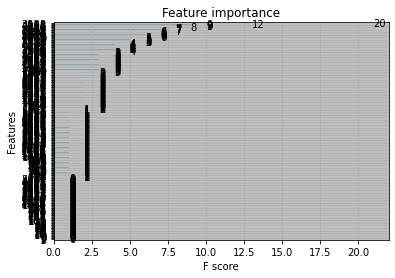

In [83]:
importanceDict = xgb_r.get_booster().get_score(importance_type="gain")

xgb.plot_importance(importance_dict_rounded)

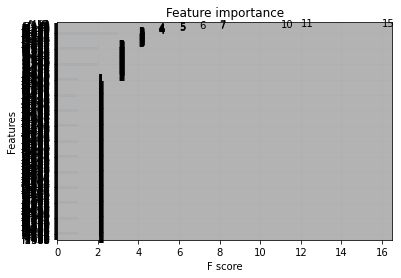

In [ ]:
xgb.plot_importance(xgb_r)


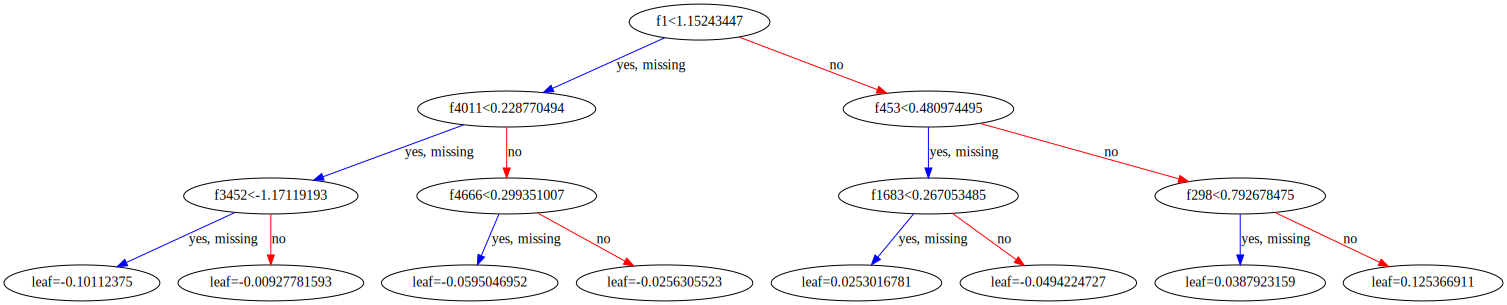

In [ ]:
# viz tree(s)
xgb.to_graphviz(xgb_r, num_trees=2)

# worse version of viz with matplotlib
# xgb.plot_tree(xgb_r, num_trees=4) # change num_trees as desired

# Random testing below here

(150, 4)

(150,)

# Comparing our network to gold standard

In [ ]:
## remounting here so I don't have to search above  for the box to run
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
expression  gold  inferred  priors


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/mlBioinfor/merlin-p_inferred_networks/yeast_networks/gold"

MacIsaac2.KO.txt      YEASTRACT_Count3.KO.txt	   YEASTRACT_Type2.KO.txt
MacIsaac2.NatVar.txt  YEASTRACT_Count3.NatVar.txt  YEASTRACT_Type2.NatVar.txt
MacIsaac2.Stress.txt  YEASTRACT_Count3.Stress.txt  YEASTRACT_Type2.Stress.txt


In [ ]:
import pandas as pd

# Gold standard networks are represented as TSVs, source \t sink
# Function to read a gold standard network file into an adjacency matrix
# Returns adjacency matrix
def read_net(filename):
  # read the adjacency list into a dataframe
  adj_list = pd.read_csv(filename, sep="\t", header=0, names=['source', 'sink'])

  # convert the adj list df to adj matrix df
  adj_mat = pd.crosstab(adj_list.source, adj_list.sink)

  # get the indexes to all the gene IDs in source and sink to make matrix square
  idx = adj_mat.columns.union(adj_mat.index)
  adj_mat = adj_mat.reindex(index=idx, columns=idx, fill_value=0)

  return adj_mat

mi2ko = read_net("/content/drive/MyDrive/Colab Notebooks/mlBioinfor/merlin-p_inferred_networks/yeast_networks/gold/MacIsaac2.KO.txt")
print(mi2ko)

         YAL003W  YAL005C  YAL012W  YAL017W  ...  YPR183W  YPR184W  YPR185W  YPR199C
YAL003W        0        0        0        0  ...        0        0        0        0
YAL005C        0        0        0        0  ...        0        0        0        0
YAL012W        0        0        0        0  ...        0        0        0        0
YAL017W        0        0        0        0  ...        0        0        0        0
YAL018C        0        0        0        0  ...        0        0        0        0
...          ...      ...      ...      ...  ...      ...      ...      ...      ...
YPR178W        0        0        0        0  ...        0        0        0        0
YPR183W        0        0        0        0  ...        0        0        0        0
YPR184W        0        0        0        0  ...        0        0        0        0
YPR185W        0        0        0        0  ...        0        0        0        0
YPR199C        0        0        0        1  ...        0        

In [ ]:
# Function to compare two networks (adjacency lists as dicts)
# Returns tuple of three values: number edges unique to net 1, shared edges, number of edges unique to net 2
def compare_nets(net_1, net_2):
  uniq_1 = 0
  shared = 0
  uniq_2 = 0
  